# Decision Tree vs Random Forest

I have taken an bank dataset from Kaggle for which we have to predict who is more likely to return the loan which they have obtained. We also check the accuracy of Decision tree and Random Forest and will find which one will be better for our use.

In [2]:
#import all data manipulation and visualization packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loan_data.csv')

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


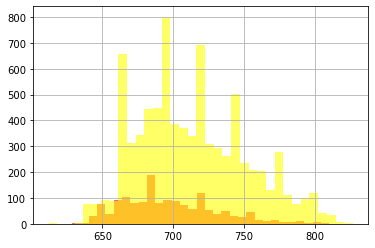

In [6]:
df[df['not.fully.paid']==1]['fico'].hist(bins=35,color='red',alpha=0.6)
df[df['not.fully.paid']==0]['fico'].hist(bins=35,color='yellow',alpha=0.6)

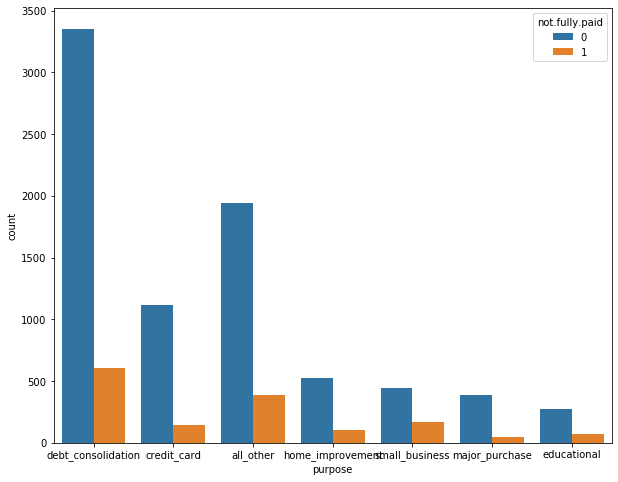

In [11]:
plt.figure(figsize=(10,8))
sns.countplot(x='purpose',hue='not.fully.paid',data=df)

* From the above plotting we can see that people who have borrowed loan for the purpose of debt consolidation has not fully returned. That the maximum number of defaulters available in that purpose category

In [12]:
purpose_feature = ['purpose']

In [13]:
final_data = pd.get_dummies(df,columns=purpose_feature,drop_first=True)

In [14]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


### Lets split the data in training and testing 

In [15]:
X = final_data.drop("not.fully.paid",axis=1)
y = final_data['not.fully.paid']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Train the model and predict 

#### Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
dTree = DecisionTreeClassifier()

In [20]:
dTree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
predictionDTree = dTree.predict(X_test)

#### Random Forest 

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rfc = RandomForestClassifier(n_estimators=300)

In [24]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [25]:
predictionRandomForest = rfc.predict(X_test)

### Comparing Decision Tree and Random Forest

In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print("Decison Tree")
print(classification_report(y_test,predictionDTree))
print('\n')
print(confusion_matrix(y_test,predictionDTree))
print('\n\n')
print("Random Forest")
print(classification_report(y_test,predictionRandomForest))
print('\n')
print(confusion_matrix(y_test,predictionRandomForest))

Decison Tree
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      3237
           1       0.21      0.24      0.22       595

    accuracy                           0.74      3832
   macro avg       0.53      0.54      0.53      3832
weighted avg       0.76      0.74      0.75      3832



[[2689  548]
 [ 452  143]]



Random Forest
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3237
           1       0.56      0.03      0.06       595

    accuracy                           0.85      3832
   macro avg       0.70      0.51      0.49      3832
weighted avg       0.80      0.85      0.78      3832



[[3222   15]
 [ 576   19]]


# 